# NFLRadar – Model Predictions Visualization
## Author: Basit Umair
## Description:
This notebook visualizes the model’s output from `out/nfl_predictions.csv`,
focusing on predicted scores, team-level trends, and season-wide patterns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")
preds = pd.read_csv("out/nfl_predictions.csv") ## bring in the .csv

preds.head()

,season,week,day,kickoff_at,pred_result,team,opponent,home_away,pred_team_score,pred_opponent_score,...,pred_offense_rushing_yards,pred_offense_turnovers,pred_defense_first_downs_allowed,pred_defense_total_yards_allowed,pred_defense_passing_yards_allowed,pred_defense_rushing_yards_allowed,pred_defense_turnovers_forced,pred_expected_points_offense,pred_expected_points_defense,pred_expected_points_special_teams
0,2025,11.0,Thu,2025-11-13 20:15:00,W,NWE,New York Jets,NaN,24.667930,19.388372,...,125.121185,1.664151,18.584028,318.95910,202.91791,122.079384,1.876812,2.661748,1.537160,-0.295103
1,2025,11.0,Thu,2025-11-13 20:15:00,L,NYJ,New England Patriots,@,19.637295,24.511639,...,118.607120,1.954517,19.985022,344.19583,221.03980,119.808560,1.615833,-1.561794,-2.905539,0.211095
2,2025,11.0,Sun,2025-11-16 09:30:00,W,MIA,Washington Commanders,NaN,25.847677,20.481709,...,115.369070,1.705763,19.186193,325.70264,213.02156,111.545380,1.993066,4.478732,-0.223319,0.185888
3,2025,11.0,Sun,2025-11-16 09:30:00,L,WAS,Miami Dolphins,@,20.070053,25.464132,...,107.673290,1.845576,20.600582,358.81305,237.04465,121.388720,1.653812,-1.364673,-4.310961,0.449855
4,2025,11.0,Sun,2025-11-16 13:00:00,L,ATL,Carolina Panthers,NaN,21.221678,22.434385,...,121.242485,1.856581,19.233736,338.71204,192.39847,139.211500,1.838049,0.621523,-0.984478,-0.086584


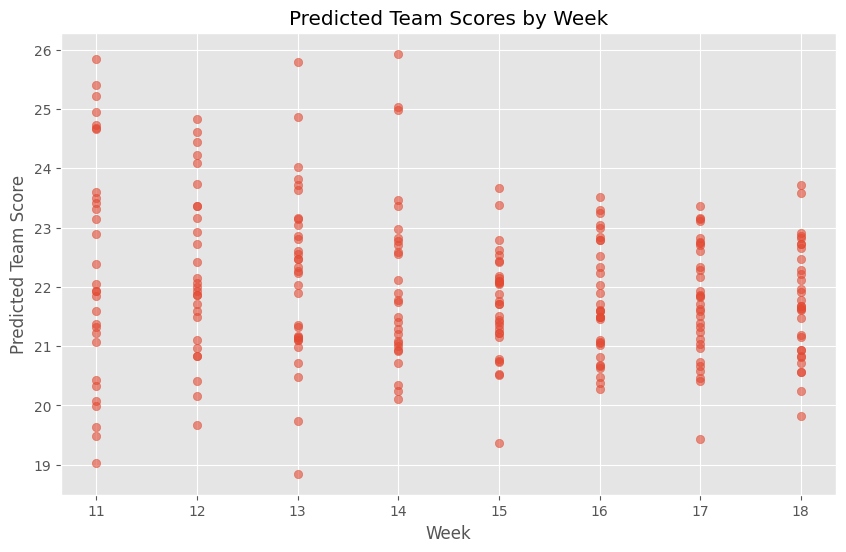

In [2]:
plt.figure(figsize=(10,6))
plt.scatter(preds["week"], preds["pred_team_score"], alpha=0.6) ## scatter graph
plt.title("Predicted Team Scores by Week")
plt.xlabel("Week")
plt.ylabel("Predicted Team Score")
plt.show()

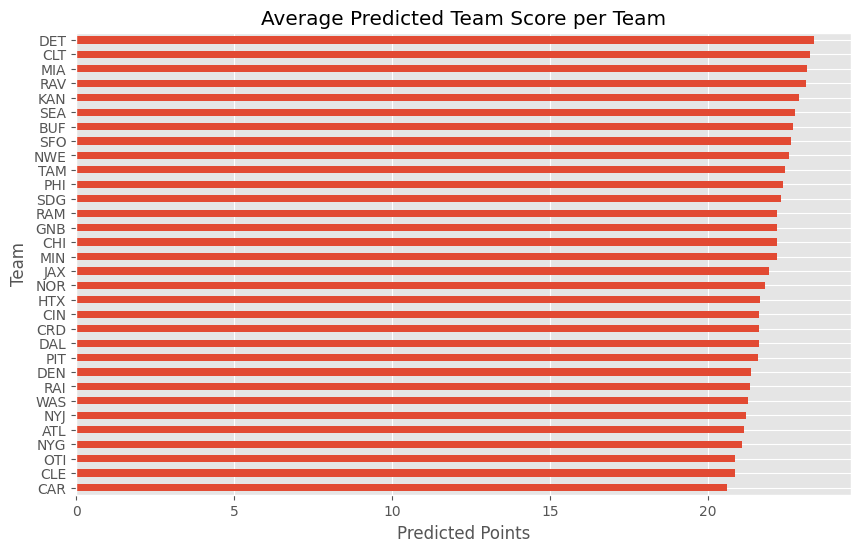

In [3]:
avg_team_scores = preds.groupby("team")["pred_team_score"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_team_scores.plot(kind="barh") ## horizontal bar graph
plt.title("Average Predicted Team Score per Team")
plt.xlabel("Predicted Points")
plt.ylabel("Team")
plt.gca().invert_yaxis()  ## highest at top
plt.show()

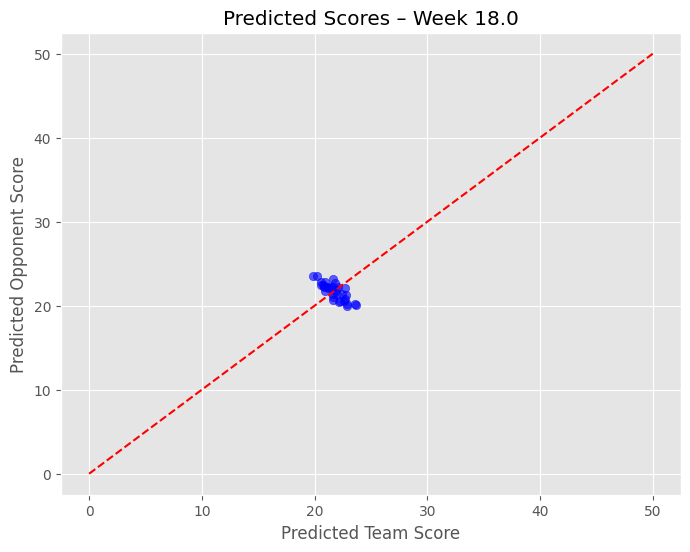

In [4]:
week_to_show = preds["week"].max()  ## show final week

week_data = preds[preds["week"] == week_to_show]

plt.figure(figsize=(8,6))
plt.scatter(week_data["pred_team_score"], week_data["pred_opponent_score"], color="blue", alpha=0.6) ## scatter plot
plt.title(f"Predicted Scores – Week {week_to_show}")
plt.xlabel("Predicted Team Score")
plt.ylabel("Predicted Opponent Score")
plt.plot([0,50], [0,50], 'r--')  ## diagonal reference
plt.show()

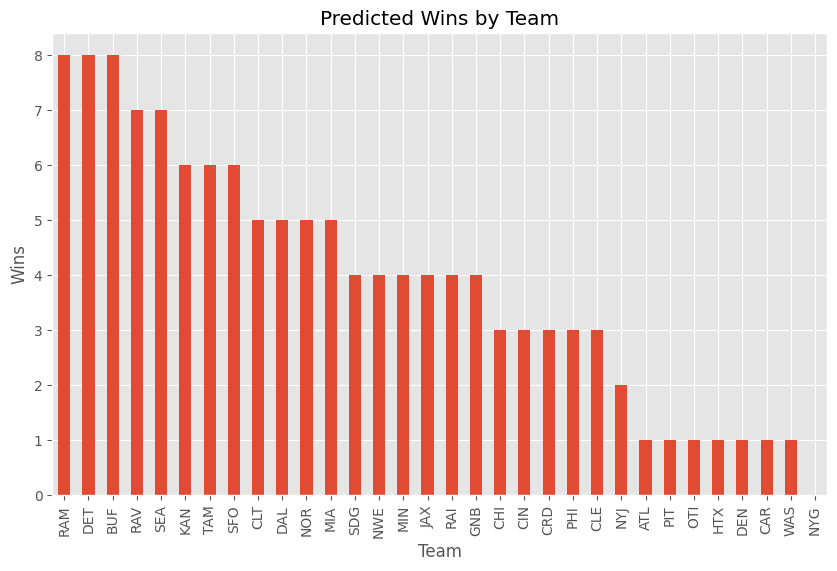

In [5]:
preds["pred_win"] = (preds["pred_team_score"] > preds["pred_opponent_score"]).astype(int)
team_wins = preds.groupby("team")["pred_win"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
team_wins.plot(kind="bar") ## bar graph
plt.title("Predicted Wins by Team")
plt.ylabel("Wins")
plt.xlabel("Team")
plt.show()

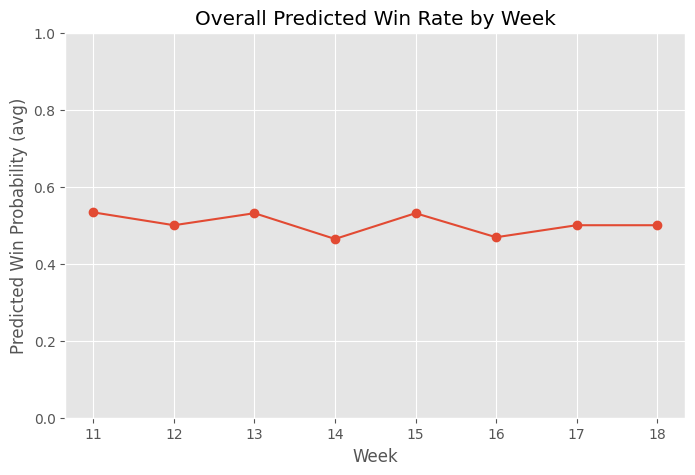

In [6]:
win_rate_by_week = preds.groupby("week")["pred_win"].mean() ## avg win rate

plt.figure(figsize=(8,5))
win_rate_by_week.plot(marker="o") ## plots graph
plt.title("Overall Predicted Win Rate by Week")
plt.xlabel("Week")
plt.ylabel("Predicted Win Probability (avg)")
plt.ylim(0,1)
plt.show()